In [2]:
import numpy as np
import numpy.linalg as la
import math
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from random import shuffle
import os

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from keras.utils import np_utils
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D, Input
from keras.applications.vgg19 import VGG19
from keras.applications.mobilenet import MobileNet

import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

import gzip
import pickle
import pandas as pd
import os

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [5]:
IMG_SIZE = 100
train_data = np.load('train_data.npy', allow_pickle=True)
test_data =  np.load('test_data.npy', allow_pickle=True)

In [6]:
def create_model():
    model_conv = MobileNet(weights='imagenet', include_top=False)#VGG19, MobileNet (MobileNet smaller)
    keras_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3), name = 'image_input')
    output_conv = model_conv(keras_input)
    x = Flatten(name='flatten')(output_conv)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(102, activation='softmax', name='predictions')(x)
    pretrained_model = Model(inputs=keras_input, outputs=x)
    pretrained_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #adagrad, rmsprop, adam, adadelta, nesterov
    return pretrained_model

model = create_model()
model.summary()

checkpoint_path = "training_1/cp.ckpt"
model.load_weights(checkpoint_path)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_input (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, None, None, 1024)  3228864  
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 fc1 (Dense)                 (None, 4096)              37752832  
                                                                 
 fc2 (Dense)                 (None, 4096)              16781312  
                                                                 
 predictions (Dense)         (None, 102)               417894    
                                                           

In [15]:
X = np.array([i[0] for i in test_data]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
Y = np.array([i[1] for i in test_data])

45
45


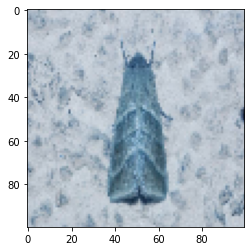

In [23]:
num = 750
img = X[num].copy()
img = np.expand_dims(img, axis = 0)

print(np.argmax(model.predict(img)))
print(np.argmax(Y[num]))
plt.imshow(X[num])

55
9


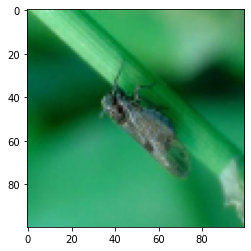

In [18]:
num = 2000
img = X[num].copy()
img = np.expand_dims(img, axis = 0)

print(np.argmax(model.predict(img)))
print(np.argmax(Y[num]))
plt.imshow(X[num])

14
14


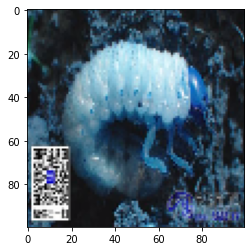

In [20]:
num = 500
img = X[num].copy()
img = np.expand_dims(img, axis = 0)

print(np.argmax(model.predict(img)))
print(np.argmax(Y[num]))
plt.imshow(X[num])

101
101


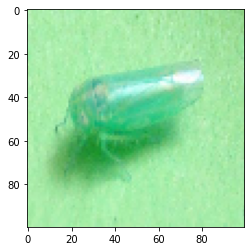

In [22]:
num = 0
img = X[num].copy()
img = np.expand_dims(img, axis = 0)

print(np.argmax(model.predict(img)))
print(np.argmax(Y[num]))
plt.imshow(X[num])